## Simulating at higher temperatures and setting $Q_{10}$ values

In [88]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [89]:
import pandas as pd

pd.set_option("display.max_rows", 10)
pd.set_option("display.max_columns", 100)
pd.set_option("display.width", 2000)
pd.set_option("display.float_format", "{:,.4f}".format)

In [90]:
from pyloric import create_prior, simulate, stats
from pyloric.utils import show_traces
import torch

### Create prior with default $Q_{10}$ values

In [91]:
prior = create_prior(customization={})
_ = torch.manual_seed(2)
p = prior.sample((1,))
p

AB/PD                                                           LP                                                           PY                                                     Synapses                                                     
        Na    CaT    CaS       A     KCa      Kd      H   Leak       Na    CaT    CaS       A    KCa       Kd      H   Leak       Na    CaT    CaS       A    KCa       Kd      H   Leak    AB-LP    PD-LP   AB-PY    PD-PY    LP-PD    LP-PY    PY-LP
0 458.7803 0.7269 5.6700 32.4157 13.6989 90.7140 0.0024 0.0027 138.5559 1.1557 2.8209 44.1501 6.1972 100.9982 0.0440 0.0210 564.8376 2.4631 3.0317 33.4177 3.7200 120.6760 0.0477 0.0278 -12.5681 -16.8734 -8.3747 -18.1356 -16.2665 -13.3063 -18.0895

### Simulate at 10 degree and at 26 degree

In [92]:
simulation_output = [simulate(p.loc[0], temperature=temp, seed=0) for temp in [283, 299]]

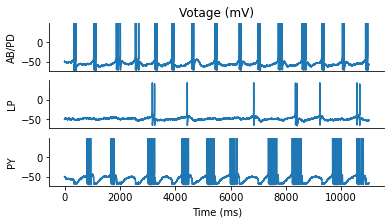

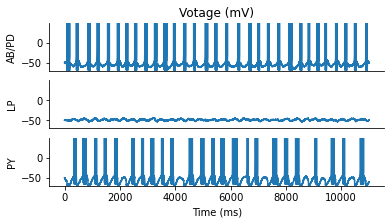

In [93]:
for sim_ in simulation_output:
    _ = show_traces(sim_)

In [94]:
stats(simulation_output[1])

cycle_period burst_durations             duty_cycles            start_phases     starts_to_starts       ends_to_starts       phase_gaps      
       Circuit              PM  LP      PY          PM  LP     PY           LP  PY         AB/PD-LP LP-PY       AB/PD-LP LP-PY   AB/PD-LP LP-PY
0     388.0080         62.2606 nan 84.5571      0.1605 nan 0.2179          nan nan              nan   nan            nan   nan        nan   nan

### Using variable $Q_{10}$ values

In [100]:
customization = {
    "Q10_gbar_mem": [True, True, True, True, True, True, True, True],
    "Q10_gbar_syn": [True, True]
}

prior = create_prior(customization=customization)
_ = torch.manual_seed(2)
p = prior.sample((1,))
p

AB/PD                                                           LP                                                           PY                                                     Synapses                                                      Q10 gbar                                                               
        Na    CaT    CaS       A     KCa      Kd      H   Leak       Na    CaT    CaS       A    KCa       Kd      H   Leak       Na    CaT    CaS       A    KCa       Kd      H   Leak    AB-LP    PD-LP   AB-PY    PD-PY    LP-PD    LP-PY    PY-LP       Na    CaT    CaS      A    KCa     Kd      H   Leak   Glut   Chol
0 458.7803 0.7269 5.6700 32.4157 13.6989 90.7140 0.0024 0.0027 138.5559 1.1557 2.8209 44.1501 6.1972 100.9982 0.0440 0.0210 564.8376 2.4631 3.0317 33.4177 3.7200 120.6760 0.0477 0.0278 -12.5681 -16.8734 -8.3747 -18.1356 -16.2665 -13.3063 -18.0895   1.1701 1.5530 1.3270 1.7248 1.3561 1.3695 1.8486 1.3875 1.1408 1.4006

### Simulate them at 10 and 26 degree
The trace at 10 degree is identical because it is the reference temperature at which $Q_{10}$ values do not play a role. The activity is slightly different at 26 degree though.

In [101]:
simulation_output = [simulate(p.loc[0], temperature=temp, customization=customization, seed=0) for temp in [283, 299]]

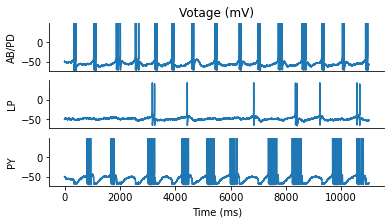

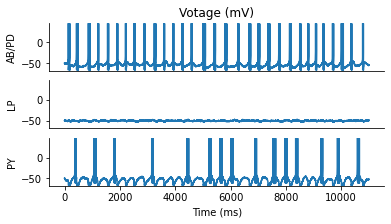

In [102]:
for sim_ in simulation_output:
    _ = show_traces(sim_)